 # HOMEWORK 4
 ---
 #  A Whale off the Port(folio)
 ---


In [256]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline


# As a GLOBAL COMMENT - the csv base files are organized a large range of date. 
# Each dataframes read in from csv files will be indexed by pandas' default fn to infer date/time and organize all dataframes.

### Data Cleaning

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns 


In [257]:
# Reading whale returns
csvpath = Path("whale_returns.csv") 
# Using Python's library, loading PATH module to direct functions to local files
whale_df = pd.read_csv(csvpath, )
# pandas "read_csv" function to create our first dataframe 

In [258]:
# Count nulls
#I used the average funtion '.mean' to find the incidents of nulls as it is a large file. 
whale_df.isnull().mean()

Date                           0.000000
SOROS FUND MANAGEMENT LLC      0.000943
PAULSON & CO.INC.              0.000943
TIGER GLOBAL MANAGEMENT LLC    0.000943
BERKSHIRE HATHAWAY INC         0.000943
dtype: float64

In [259]:
# Drop nulls
# Dropping NA nullset items then passing "inplace=True" to ensure that the file was properly cleaned.  
whale_df.dropna(inplace=True)

#Quick check of the data file to ensure dropna functioned properly, all the through row #1059. Did not use '.head()' fn because- would not provide 1through1059 overview 
whale_df 

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [260]:
whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)
whale_df.drop(columns=['Date'], inplace=True)
whale_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [261]:
whale_df= whale_df.astype('float')
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [262]:
# Reading algorithmic returns
# Same procedure as above - 'whale_returs.csv' 
csv_algo = Path('algo_returns.csv')
algo_data = pd.read_csv(csv_algo)
algo_data

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [263]:
# Count nulls
algo_data.isnull()  
#sampling nulltypes in the data 

,Date,Algo 1,Algo 2
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
1236,False,False,False
1237,False,False,False
1238,False,False,False
1239,False,False,False


In [264]:
#added another cell to ensure total count with '.sum()' fn. 
algo_data.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [265]:
# Drop nulls
algo_data.dropna(inplace=True)
algo_data

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [266]:
#Last Check to ensure NAs were properly dropped 
algo_data.isnull().sum()

#indeed they are

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [267]:
algo_data.set_index(pd.to_datetime(algo_data['Date'], infer_datetime_format=True), inplace=True)
algo_data.drop(columns=['Date'], inplace=True)

algo_data


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [268]:
algo_data['Algo 1']=algo_data['Algo 1'].astype('float')

algo_data['Algo 2']=algo_data['Algo 2'].astype('float')

algo_data
algo_data.dtypes

# This was a recursive step - as I forgot to convert these elements to"float" so I came back to convert this as STD() fn was malfunctioning without "Float" Type properly declared 

Algo 1    float64
Algo 2    float64
dtype: object

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [269]:
# Reading S&P 500 Closing Prices
sp500csv = Path('sp500_history.csv')
sp500_data = pd.read_csv(sp500csv)
sp500_data

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
...,...,...
1644,5-Oct-12,$1460.93
1645,4-Oct-12,$1461.40
1646,3-Oct-12,$1450.99
1647,2-Oct-12,$1445.75


In [270]:
# Check Data Types
sp500_data.dtypes
#as an object 'type' we can't do much data parsing or combining. More universal format would be a floating point.

Date     object
Close    object
dtype: object

In [271]:
# Fix Data Types
#I tried - just converting 'str.replace()' with pandas directly 
#converting a STR to replacement values - from $ to float. 
# Not successful = because it turns the entire "CLOSE" column into "NONE" objects. 

#Instead, I created a custom function - with a conditional loop.  
#Using python's 'if isinstance' function, looped through the data to find whether 
# 1. if values = str, then return TRUE/FALSE
# 2. Additional, upon passing the 'return' of clean_currency fn, the oject 'x' was to be replaced 
# with '', when each instance of the str is encountered.  

def clean_currency(x):
    if isinstance(x,str):
        return(x.replace('$',''))
    return(x)

#Next - APPLYING THE function - inline - with the updated sp500_data dataframe 


sp500_data['Close']=sp500_data['Close'].apply(clean_currency).astype('float')
sp500_data

#also - inline with applying my clean_currency fn, I pass the 'astype' fn to convert all values to 'float'. 
#SUCCESS !!!! NO $ symbol, and we retain the 'float' data ! 

,Date,Close
0,23-Apr-19,2933.68
1,22-Apr-19,2907.97
2,18-Apr-19,2905.03
3,17-Apr-19,2900.45
4,16-Apr-19,2907.06
...,...,...
1644,5-Oct-12,1460.93
1645,4-Oct-12,1461.40
1646,3-Oct-12,1450.99
1647,2-Oct-12,1445.75


In [272]:
#To properly calculate returns on this dataframe, must infer date/time format
#then proceed to drop the unsured "date" column because it is an OBJ type that will not be supported by pandas fns

sp500_data.set_index(pd.to_datetime(sp500_data['Date'], infer_datetime_format=True), inplace=True)
sp500_data.drop(columns=['Date'], inplace=True)

sp500_data



,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [273]:
# We are only left with an actual date index, and the final close price 
# Last step - is to check to make sure that we have both 
# DATE-Format  & Float elements in each column to properly run Pandas Fn

sp500_data.dtypes

Close    float64
dtype: object

In [274]:
# Calculate Daily Returns
# Using Python Pandas' per-instance-change function, calculates the delta between today's close price and yesterday's close price - as a decimal.  
# The product of such function will be multiplied by 100 to calculate the actual % daily 

sp500_returns = sp500_data.pct_change() 
sp500_returns

#Note:  1st NaN (not-a-number) designation exists because there is no %delta from the day before because the chart begins at 04/23/2019.  Therein, there would be no prior date (04/22/2019) from which to pass a 'pct_chg()' fn.

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [275]:
# Drop nulls
sp500_data.isnull().mean()

#null check with 'isnull' fn.  No Nulls found 

Close    0.0
dtype: float64

In [276]:
# Rename `Close` Column to be specific to this portfolio.
sp500_data.columns
columns = ["SP500"]
sp500_data.columns = columns
sp500_data.head()

# Settting a variable equal to the column name (usually a list), but since there is only 1 item in this dataframe, only 1 value required.
# THen, using the '.columns' fn in pandas to pass the "columns" variable, just created 
# The above will replace the existing column names to match my "columns" variable list 

# Because the other files in the portfolio reflect Nasdaq Closing Price (NOCP), I change this dataframe's column name from "Close" to "NOCP, to match the other data for ease of use and future concatenation. "

,SP500
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


## Combine Whale, Algorithmic, and S&P 500 Returns

In [277]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# TO join all dataframes - I used Pandas fn, 'pd.concat' to join with "columns" axis 
# Previous dataframes are objects already created, no quotation marks need to be used
# After trying all variations, some data starts in 2012, others start in 2015. 
# I even proceeded with an "outer" join or union, then tried truncating the upper and lower extremes of the dataframe.  
# Ultimately it was the cleanest and best use of overlapping data to pass an "inner" join while concatenating all 3 dataframes together
all_portfolios = pd.concat([whale_df,sp500_data,algo_data], axis="columns", join = "inner")
all_portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,2107.78,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,2098.53,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,2101.04,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,2071.26,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,2079.43,-0.005447,0.001303
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,2907.06,-0.006945,0.002899
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,2900.45,-0.010301,-0.005228
2019-04-18,0.001448,0.001222,0.000582,0.001916,2905.03,-0.000588,-0.001229


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [278]:
# Plot daily returns of all portfolios
# Daily returns - pass pandas fn, 'pct_change()' for the combined portfolio 'all_portfolios'

portfolio_returns = all_portfolios.pct_change()
portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,-0.004389,3.422374,-3.544766
2015-03-05,0.800968,0.257544,-1.929234,0.596558,0.001196,-0.888803,0.789231
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,-0.014174,4.190043,-3.650914
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.003944,0.098917,-1.113716
...,...,...,...,...,...,...,...
2019-04-16,-2.898341,-1.335693,-3.088322,-1.079744,0.000509,0.603391,-1.634218
2019-04-17,-2.073108,-17.661104,4.306537,2.851033,-0.002274,0.483294,-2.803170
2019-04-18,-1.499843,-1.188925,-1.131886,-0.405345,0.001579,-0.942926,-0.764890


<AxesSubplot:xlabel='Date'>

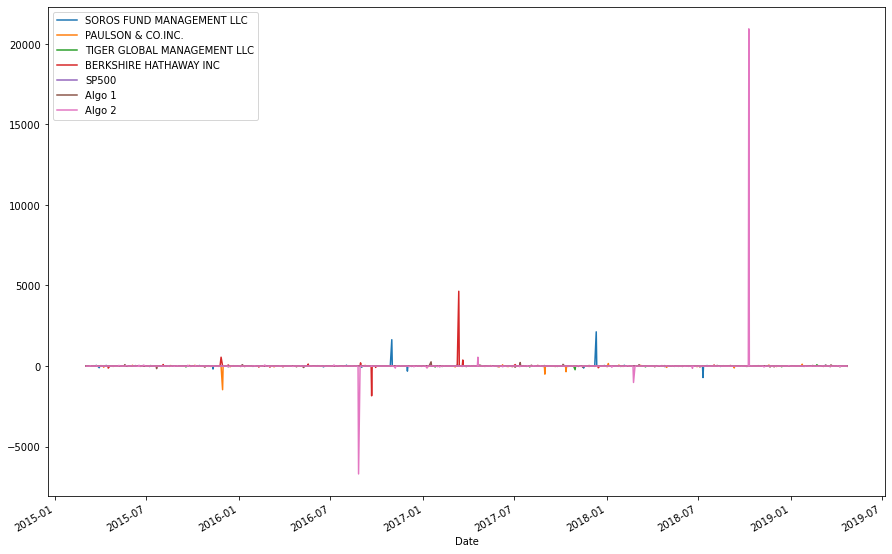

In [279]:
# Now to plot the returns 

portfolio_returns.plot(figsize=(15,10))

###  I tried creating a pandas mask 
# and assess the viability of masking off the extremities of the dataframe.  
---
See above *  ultimately, I decided against it, and instead, used a simple "inner" join while concatenating the 3 dataframes.  
---
start_date = '2012-10-01'
end_date =  '2015-03-02'
no_values = (portfolio_returns["Date"] > start_date) & (portfolio_returns["Date"] <= end_date)


#### Calculate and Plot cumulative returns.

In [280]:
# Calculate cumulative returns of all portfolios
# Pandas fn - cumulative product - calculates the daily change, as a serial multiplation across each column in the dataframe
# to Calculate Cumulative RETURN, we take 1 + daily returns('pct_cange()') then pass the '.cumprod()' Pandas fn

cumulative_portfolio_returns = (1 + portfolio_returns).cumprod(axis=1)
cumulative_portfolio_returns

# 'CumProd' fn caused me quite a bit of trouble.  With all the previous tables and calculations
# the last years, 2017-2019 were giving me NaN values, which makes no sense because the daily_returns dataframe yielded daily results, so there there was NO REASON that passing 'CumProd' fn would cause NaN results. 
# I tried a variety of different fixes, but the one that seemed to work was to specify within 'CumProd' to pin the axis as = 1, because OF COURSE. 



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-1.762070,1.146740,5.864024,-3.761073,-3.744567,-16.559877,42.141006
2015-03-05,1.800968,2.264797,-2.104526,-3.359997,-3.364016,-0.374068,-0.669294
2015-03-06,-1.968465,1.726023,-6.216913,12.106084,11.934493,61.940533,-164.199009
2015-03-09,-0.073656,0.087080,-0.059990,-0.007568,-0.007598,-0.008350,0.000950
...,...,...,...,...,...,...,...
2019-04-16,-1.898341,0.637260,-1.330804,0.106124,0.106178,0.170244,-0.107972
2019-04-17,-1.073108,17.879157,94.876410,365.372144,364.541370,540.721934,-975.013664
2019-04-18,-0.499843,0.094433,-0.012454,-0.007406,-0.007418,-0.000423,-0.000100


<AxesSubplot:xlabel='Date'>

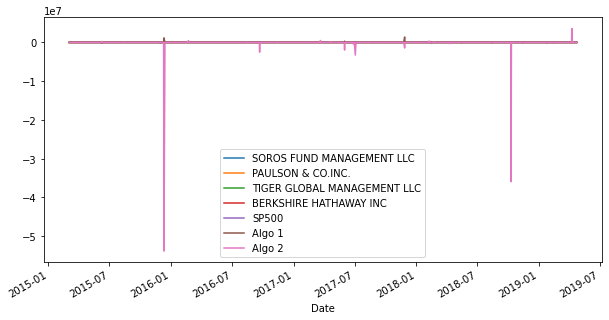

In [281]:
cumulative_portfolio_returns.plot(figsize=(10,5))

---

## Risk Analysis



### Create a box plot for each portfolio
---

# Box plot to visually show risk
""" Risk - is most generally associated with how widely a set of data varies from the median or 'center-point'. 
The more widely an asset swings or varies from the center-point, the more "risky" or "violatile" the asset is perceived. 
Because we are analying 3 separate dataframes, with the SP500 as the "market" or the ONE to beat, and the added complexity of 
trying to compare with an index, (SP500), we can use a variety of different tools or visualization techniques like 

1. sharpe ratios, 
2. heat maps, 
3. daily standard deviation, and 
4, annual standard deviation 

to assess "riskiness" of our particular portfolio. 
This part of the assignment really starts to gets fun. 

In an effort for brevity, I will follow the assignment as each of the above 
will come up in some form or another, and I need not exhaust all possible approaches in one segment 
of the assignment =)

"""


### Calculate Standard Deviations

In [282]:
# Calculate the daily standard deviations of all portfolios
# Retreating a few steps in our previous cells, standard deviations will be calculated upon daily returns (i.e. 'pct_change()' in Pandas)
# I used ' portfolio_returns ' fn so our analysis continues 

portfolio_returns_SD = portfolio_returns.std() 
portfolio_returns_SD




SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
TIGER GLOBAL MANAGEMENT LLC           NaN
BERKSHIRE HATHAWAY INC                NaN
SP500                            0.008556
Algo 1                          15.710988
Algo 2                         682.184701
dtype: float64

### NO!!!!!
---
*The* fact that I have NaN values means that it only takes 1 cell to fail in order for 'std()' to break.  

I will have to refine my dataframe further.  I modified the fn window to include the entire dataframe, then tried to figure out how to proceed

In [283]:
pd.set_option('display.max_rows', 200)
portfolio_returns


# I found more NaN values (even though they were previously dropped)
# as well as 'inf' infinite values.  



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,-0.004389,3.422374,-3.544766
2015-03-05,0.800968,0.257544,-1.929234,0.596558,0.001196,-0.888803,0.789231
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,-0.014174,4.190043,-3.650914
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.003944,0.098917,-1.113716
...,...,...,...,...,...,...,...
2019-04-16,-2.898341,-1.335693,-3.088322,-1.079744,0.000509,0.603391,-1.634218
2019-04-17,-2.073108,-17.661104,4.306537,2.851033,-0.002274,0.483294,-2.803170
2019-04-18,-1.499843,-1.188925,-1.131886,-0.405345,0.001579,-0.942926,-0.764890


In [284]:
# Perform more datacleaning with concatenated dataframe 

portfolio_returns.dropna(inplace=True)
portfolio_returns.describe()

# using 'describe()' fn, we can see that there remains some infinite values even though Nulls were dropped 
# therein, mean, std, cannot be properly calculated 
# next step - eradicate inf values 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500,Algo 1,Algo 2
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,NaN,NaN,NaN,NaN,0.000328,-0.746951,11.762756
std,NaN,NaN,NaN,NaN,0.008572,15.805676,686.483154
min,-inf,-inf,-inf,-inf,-0.040979,-162.022010,-6700.835648
25%,-2.046724,-1.941485,-2.018511,-2.028801,-0.002903,-2.020080,-2.092840
50%,-0.990146,-0.999208,-1.079316,-1.000000,0.000418,-1.003772,-0.951680
75%,-0.025888,-0.023266,-0.009684,0.031190,0.004463,-0.022123,-0.123315
max,inf,inf,inf,inf,0.049594,260.395026,20934.213133


In [285]:
# Eradicating 'inf' values 
portfolio_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
# as we can see from the above cells, '.dropna()' does not affect 'inf' values
# creating parameters +infinity and -infinity - as the range, using Numpy functions to replace infinity with 'NaN' values
# THEN, I can pass '.dropna()'after infinities have been eradicated 
# Let's Try it ! 

portfolio_returns.dropna(inplace=True)
portfolio_returns.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500,Algo 1,Algo 2
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,1.379197,-3.156436,-1.691436,2.913370,0.000266,-0.710666,11.951691
std,88.422441,51.219954,9.901103,158.901767,0.008579,15.703004,691.886917
min,-716.443922,-1469.807984,-230.151558,-1849.682402,-0.040979,-162.022010,-6700.835648
25%,-2.046724,-1.931603,-2.003975,-2.026959,-0.002913,-2.020080,-2.096271
50%,-1.000000,-1.000000,-1.086405,-1.000000,0.000373,-1.003815,-0.962177
75%,-0.058270,-0.070171,-0.037222,-0.045442,0.004442,-0.030449,-0.132412
max,2123.554586,154.039069,80.435738,4641.531847,0.049594,260.395026,20934.213133


### SUCCESS !!! 
We can see Mean. Std. and all other functions are properly restored to this dataframe.  

In [286]:
# Now we can run the Standard Deviation function again 

portfolio_returns_SD = portfolio_returns.std() 
portfolio_returns_SD


SOROS FUND MANAGEMENT LLC       88.422441
PAULSON & CO.INC.               51.219954
TIGER GLOBAL MANAGEMENT LLC      9.901103
BERKSHIRE HATHAWAY INC         158.901767
SP500                            0.008579
Algo 1                          15.703004
Algo 2                         691.886917
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [287]:
# Calculate  the daily standard deviation of S&P 500
# I've already defined the object for daily returns on the SP500, so i will pass the 'std()' fn 

sp500_returns_SD=sp500_returns.std()
sp500_returns_SD


# Determine which portfolios are riskier than the S&P 500

portfolio_returns_SD * np.sqrt(252)
portfolio_returns_SD.sort_values(inplace=True)
portfolio_returns_SD

#SP500 - seems to be rather low risk. 
# EVERY Other portfolio will be riskier than the SP500 


SP500                            0.008579
TIGER GLOBAL MANAGEMENT LLC      9.901103
Algo 1                          15.703004
PAULSON & CO.INC.               51.219954
SOROS FUND MANAGEMENT LLC       88.422441
BERKSHIRE HATHAWAY INC         158.901767
Algo 2                         691.886917
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

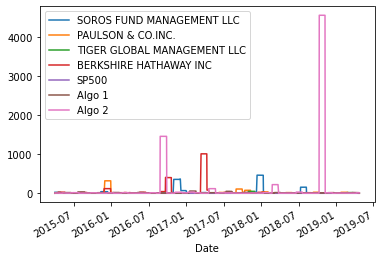

In [288]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
# I will use the '.rolling(window=7).std().plot()' 
# Combination fn to create the window for a rolling window calculation and plot in the same fn line 

portfolio_returns.rolling(window=21).std().plot()

### Calculate and plot the correlation

<AxesSubplot:>

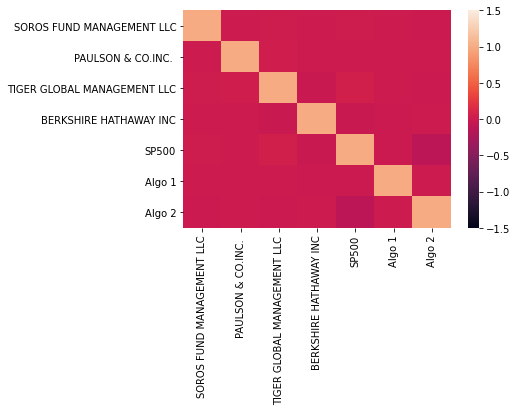

In [289]:
import seaborn as sns
%matplotlib inline

# Calculate the correlation
correlation = portfolio_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1.5, vmax=1.5)

In [290]:
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [291]:
# Calculate covariance of a single portfolio
# I wanted to see how Algo trading portfolio did against the SP500 

covariance = portfolio_returns['Algo 1'].cov(portfolio_returns['Algo 1'])
covariance



246.58432790287503

In [292]:
# Calculate variance of S&P 500
variance = portfolio_returns['SP500'].var()
variance



7.360509372476666e-05

In [293]:
# Computing beta
algo1_beta = covariance / variance
algo1_beta


3350098.687801878

In [294]:
# Plot beta trend
rolling_covariance21 = portfolio_returns['Algo 1'].rolling(window=21).cov()
rolling_covariance21.dropna(inplace=True)
rolling_covariance21.head()

Date
2015-04-01    5.786382
2015-04-02    5.097150
2015-04-06    5.951043
2015-04-07    4.719872
2015-04-08    5.158901
Name: Algo 1, dtype: float64

In [295]:
rolling_variance21 = portfolio_returns['Algo 1'].rolling(window=21).var()
rolling_variance21.dropna(inplace=True)
rolling_variance21.head()

Date
2015-04-01    5.786382
2015-04-02    5.097150
2015-04-06    5.951043
2015-04-07    4.719872
2015-04-08    5.158901
Name: Algo 1, dtype: float64

<AxesSubplot:title={'center':'Rolling 21-day Beta Algo1 & SP500'}, xlabel='Date'>

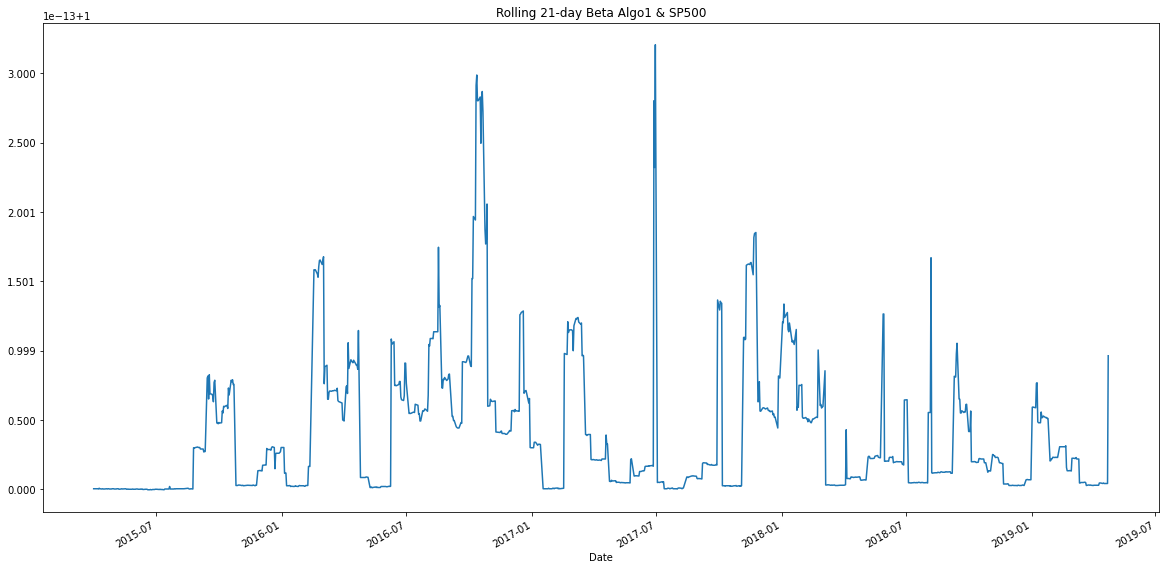

In [296]:
import seaborn as sns
rolling_beta21 = rolling_covariance21 / rolling_variance21
rolling_beta21.plot(figsize=(20,10), title='Rolling 21-day Beta Algo1 & SP500')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window
# EWN with 21 - day decay period 
times = portfolio_returns.rolling(window=21)
portfolio_returns.ewm(halflife='21 days', times=pd.DatetimeIndex(times)).mean()


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios
sharpe_ratios = ((portfolio_returns.mean() *252)/(portfolio_returns.std()*np.sqrt(252)))
sharpe_ratios.head()

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

# ***Algo***  Trading is pretty mixed. 
Using SP500 as the benchmark - as it an index, overseeing a multitude of companies and funds, <u>*Algo1*</u>  would not even come close to the SP500, in fact performing poorly as compared to BRK, Soros, as well as SP500.  

## <u>*Algo2*</u> however, does seem to perform markedly better relative to the the funds we are reviewing at present. 

### <u>***Conventionally***</u> "beat the  market" gimmicks have become so passe and common as to earn it the title of merely being a trope at this point.  

### Even the Whales' portfolios have performed significantly poorly over a 5-8 year period, "Paulson" & "Tiger Management" with the exception of "Soros Fund" and "BRK."  

### Provided how much time, energy, money, training, and human capital required to operate a fund, the fact that <u>*Algo2*</u> performed just as well as Soros and BRK is asounding. 

####  <u>Even so</u>, in totality, Sharpe Ratios of greater than 2 are to be commended and pursued.  In our small dataset for this timeperiod 5-8 years, no portfolios were able to achieve at or close to a Sharpe Ratio of even 1. 



# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [307]:
# Reading data from 1st stock  #GOOGLE 
csv_goog=Path('goog_historical.csv')
goog_df=pd.read_csv(csv_goog)
goog_df.set_index(pd.to_datetime(goog_df['Trade DATE'], infer_datetime_format=True), inplace=True)
goog_df['NOCP'].astype('float')
goog_df.drop(columns=['Trade DATE'],inplace=True)
goog_df.drop(columns=['Symbol'],inplace=True)


In [309]:
#Checking my work to ensure the correct Dataframe was created. 
goog_df


,NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40
...,...
2018-05-17,1078.59
2018-05-16,1081.77
2018-05-15,1079.23


In [311]:
# Reading data from 2nd stock #APPLE
csv_aapl=Path('aapl_historical.csv')
aapl_df=pd.read_csv(csv_aapl)
aapl_df.set_index(pd.to_datetime(aapl_df['Trade DATE'], infer_datetime_format=True), inplace=True)
aapl_df['NOCP'].astype('float')
aapl_df.drop(columns=['Trade DATE'],inplace=True)
aapl_df.drop(columns=['Symbol'],inplace=True)
aapl_df.head()

,NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [312]:
# Reading data from 3rd stock #COSTCO
csv_cost=Path('cost_historical.csv')
cost_df=pd.read_csv(csv_cost)
cost_df.set_index(pd.to_datetime(cost_df['Trade DATE'], infer_datetime_format=True), inplace=True)
cost_df['NOCP'].astype('float')
cost_df.drop(columns=['Trade DATE'],inplace=True)
cost_df.drop(columns=['Symbol'],inplace=True)
cost_df.head()

,NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [313]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([goog_df, aapl_df, cost_df], axis='columns', join = 'inner')
combined_df

,NOCP,NOCP,NOCP
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62
...,...,...,...
2018-05-17,1078.59,186.99,199.60
2018-05-16,1081.77,188.18,198.71
2018-05-15,1079.23,186.44,195.48


In [316]:
combined_df.columns
columns = ["Google", "Apple", "Costco"]
combined_df.columns=columns
combined_df.head()

,Google,Apple,Costco
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [321]:
# Reset Date index
combined_df.sort_values(["Google", "Apple", "Costco"],ascending=True)
#Already Done, but now we can sort values by ascneidng rather than descending. 

,Google,Apple,Costco
Trade DATE,,,
2018-12-24,976.22,146.83,189.99
2018-12-21,979.54,150.73,194.52
2018-12-20,1009.41,156.83,197.13
2019-01-03,1016.06,142.19,200.42
2018-12-17,1016.53,163.94,202.23
...,...,...,...
2018-07-25,1263.70,194.82,220.70
2019-04-23,1264.55,207.48,245.58
2018-07-26,1268.33,194.21,221.72


In [ ]:
# Reorganize portfolio data by having a column per symbol
#Already done - in data sorting and data cleaning *ABOVE*

In [323]:
#reviewing all my data again in DF 
combined_df.describe()


,Google,Apple,Costco
count,250.000000,250.000000,250.000000
mean,1137.256440,191.735720,222.109320
std,67.846776,21.436472,14.434399
min,976.220000,142.190000,189.990000
25%,1079.385000,174.895000,210.360000
50%,1139.305000,190.750000,221.770000
75%,1193.290000,208.877500,233.847500
max,1287.580000,232.070000,247.960000


In [327]:
# Calculate daily returns
# Drop NAs
# Display sample data

combined_returns = combined_df.pct_change()
combined_returns.dropna()
combined_returns


,Google,Apple,Costco
Trade DATE,,,
2019-05-09,NaN,NaN,NaN
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
...,...,...,...
2018-05-17,0.011469,0.003650,0.003217
2018-05-16,0.002948,0.006364,-0.004459
2018-05-15,-0.002348,-0.009246,-0.016255


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [329]:
# Set weights
# Calculate portfolio return
# Display sample data

weights = [1/3, 1/3, 1/3]
goog_weight = .333333333
aapl_weight = .333333333
cost_weight = .333333333
weighted_returns = combined_returns.dot(weights)
weighted_returns


Trade DATE
2019-05-09         NaN
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
                ...   
2018-05-17    0.006112
2018-05-16    0.001618
2018-05-15   -0.009283
2018-05-14    0.010216
2018-05-11   -0.000012
Length: 250, dtype: float64

combined_returns 
and
weighted_returns



## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [334]:
# Join your returns DataFrame to the original returns DataFrame
joined_df = pd.concat([combined_returns, weighted_returns], axis='columns', join='inner')
joined_df

,Google,Apple,Costco,0
Trade DATE,,,,
2019-05-09,NaN,NaN,NaN,NaN
2019-05-08,0.003347,0.010861,-0.008749,0.001820
2019-05-07,0.006714,-0.000197,-0.004806,0.000570
2019-05-06,0.013023,0.027704,0.016862,0.019196
2019-05-03,-0.003355,0.015685,0.001597,0.004642
...,...,...,...,...
2018-05-17,0.011469,0.003650,0.003217,0.006112
2018-05-16,0.002948,0.006364,-0.004459,0.001618
2018-05-15,-0.002348,-0.009246,-0.016255,-0.009283


In [335]:
#combining all dataframes - renaming 

joined_df.columns
columns = ["Google", "Apple", "Costco", "WeightedRTN"]
joined_df.columns=columns
joined_df.head()

,Google,Apple,Costco,WeightedRTN
Trade DATE,,,,
2019-05-09,NaN,NaN,NaN,NaN
2019-05-08,0.003347,0.010861,-0.008749,0.001820
2019-05-07,0.006714,-0.000197,-0.004806,0.000570
2019-05-06,0.013023,0.027704,0.016862,0.019196
2019-05-03,-0.003355,0.015685,0.001597,0.004642


In [336]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_df.dropna()

,Google,Apple,Costco,WeightedRTN
Trade DATE,,,,
2019-05-08,0.003347,0.010861,-0.008749,0.001820
2019-05-07,0.006714,-0.000197,-0.004806,0.000570
2019-05-06,0.013023,0.027704,0.016862,0.019196
2019-05-03,-0.003355,0.015685,0.001597,0.004642
2019-05-02,-0.019226,-0.012279,-0.007890,-0.013131
...,...,...,...,...
2018-05-17,0.011469,0.003650,0.003217,0.006112
2018-05-16,0.002948,0.006364,-0.004459,0.001618
2018-05-15,-0.002348,-0.009246,-0.016255,-0.009283


In [337]:
joined_df.describe()

#checking 'inf' - NO INFs !

,Google,Apple,Costco,WeightedRTN
count,249.000000,249.000000,249.000000,249.000000
mean,-0.000089,-0.000074,-0.000787,-0.000317
std,0.016714,0.018923,0.013439,0.013363
min,-0.060839,-0.065789,-0.048415,-0.056709
25%,-0.009522,-0.008914,-0.007073,-0.006668
50%,-0.000101,-0.001325,-0.002773,-0.001663
75%,0.007202,0.008134,0.004189,0.004752
max,0.083384,0.110627,0.093934,0.053867


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [338]:
# Calculate the annualized `std`
volatility = joined_df.std() * np.sqrt(252)
volatility

Google         0.265322
Apple          0.300387
Costco         0.213344
WeightedRTN    0.212131
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [339]:
# Calculate rolling standard deviation

joined_df.rolling(window=21).std()



,Google,Apple,Costco,WeightedRTN
Trade DATE,,,,
2019-05-09,NaN,NaN,NaN,NaN
2019-05-08,NaN,NaN,NaN,NaN
2019-05-07,NaN,NaN,NaN,NaN
2019-05-06,NaN,NaN,NaN,NaN
2019-05-03,NaN,NaN,NaN,NaN
...,...,...,...,...
2018-05-17,0.011718,0.006704,0.007980,0.005694
2018-05-16,0.011342,0.006864,0.007842,0.005724
2018-05-15,0.011325,0.006694,0.008239,0.005943


<AxesSubplot:xlabel='Trade DATE'>

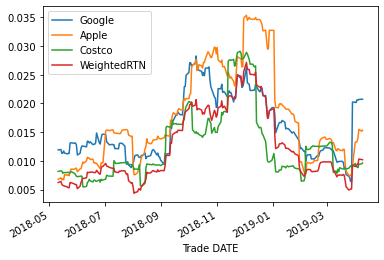

In [340]:
# Plot rolling standard deviation

joined_df.rolling(window=21).std().plot()



### Calculate and plot the correlation

In [341]:
# Calculate and plot the correlation
correlation = joined_df.corr()
correlation

,Google,Apple,Costco,WeightedRTN
Google,1.000000,0.648156,0.375228,0.848645
Apple,0.648156,1.000000,0.413964,0.881018
Costco,0.375228,0.413964,1.000000,0.687074
WeightedRTN,0.848645,0.881018,0.687074,1.000000


<AxesSubplot:>

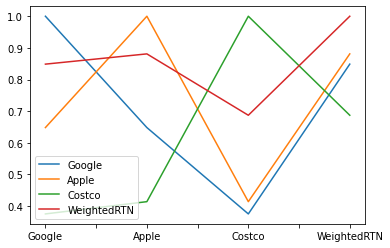

In [344]:
correlation.plot()

<AxesSubplot:>

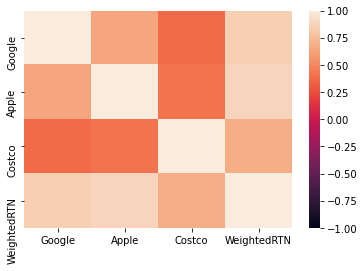

In [347]:
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [372]:
# Calculate and plot Beta - we're going to need the SP500 data again, so I will read it into this file and concat
csv_sp500=Path('sp500_history.csv')
sp500_df=pd.read_csv(csv_sp500)
sp500_df['Close']=sp500_df['Close'].apply(clean_currency).astype('float')
sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format=True), inplace=True)
sp500_df['Close'].astype('float')
sp500_df.drop(columns=['Date'],inplace=True)



sp500_df.pct_change()
sp500_df


TypeError: shift() got an unexpected keyword argument 'inplace'

In [376]:
sp500_df=sp500_df.pct_change() 
sp500_df



,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [377]:
joined_sp500 = pd.concat([joined_df, sp500_df], axis = 'columns', join ='inner')
joined_sp500

,Google,Apple,Costco,WeightedRTN,Close
2019-04-23,0.006807,0.001545,-0.009598,-0.000415,NaN
2019-04-22,-0.012423,-0.014218,-0.008796,-0.011812,-0.008764
2019-04-18,-0.009985,-0.003276,0.009818,-0.001148,-0.001011
2019-04-17,-0.000024,-0.003581,-0.001017,-0.001541,-0.001577
2019-04-16,-0.007449,-0.019101,-0.000896,-0.009149,0.002279
...,...,...,...,...,...
2018-05-17,0.011469,0.003650,0.003217,0.006112,0.002639
2018-05-16,0.002948,0.006364,-0.004459,0.001618,0.000857
2018-05-15,-0.002348,-0.009246,-0.016255,-0.009283,-0.004044
2018-05-14,0.019431,0.009172,0.002046,0.010216,0.006889


In [378]:
joined_sp500.columns
columns = ["Google", "Apple", "Costco", "WeightedRTN", "SP500"]
joined_sp500.columns=columns
joined_sp500.head()

,Google,Apple,Costco,WeightedRTN,SP500
2019-04-23,0.006807,0.001545,-0.009598,-0.000415,NaN
2019-04-22,-0.012423,-0.014218,-0.008796,-0.011812,-0.008764
2019-04-18,-0.009985,-0.003276,0.009818,-0.001148,-0.001011
2019-04-17,-0.000024,-0.003581,-0.001017,-0.001541,-0.001577
2019-04-16,-0.007449,-0.019101,-0.000896,-0.009149,0.002279


In [379]:
rolling_goog_covariance = joined_sp500['Google'].rolling(window=60).cov(joined_sp500['SP500'])
rolling_aapl_covariance = joined_sp500['Apple'].rolling(window=60).cov(joined_sp500['SP500'])
rolling_cost_covariance = joined_sp500['Costco'].rolling(window=60).cov(joined_sp500['SP500'])

#Rolling Variance of S&P 500 - at 6 days 
rolling_variance = joined_sp500['SP500'].rolling(window=60).var()

#Calculating the 30-day rolling beta of Google, Apple, & Costco
rolling_goog_beta = rolling_goog_covariance / rolling_variance 
rolling_aapl_beta = rolling_aapl_covariance / rolling_variance
rolling_cost_beta = rolling_cost_covariance / rolling_variance

rolling_goog_beta
rolling_aapl_beta
rolling_cost_beta


2019-04-23         NaN
2019-04-22         NaN
2019-04-18         NaN
2019-04-17         NaN
2019-04-16         NaN
                ...   
2018-05-17    0.378838
2018-05-16    0.367607
2018-05-15    0.440333
2018-05-14    0.406023
2018-05-11    0.406689
Length: 238, dtype: float64

<AxesSubplot:title={'center':'Rolling 60day Beta of Portfolio vs SP500'}>

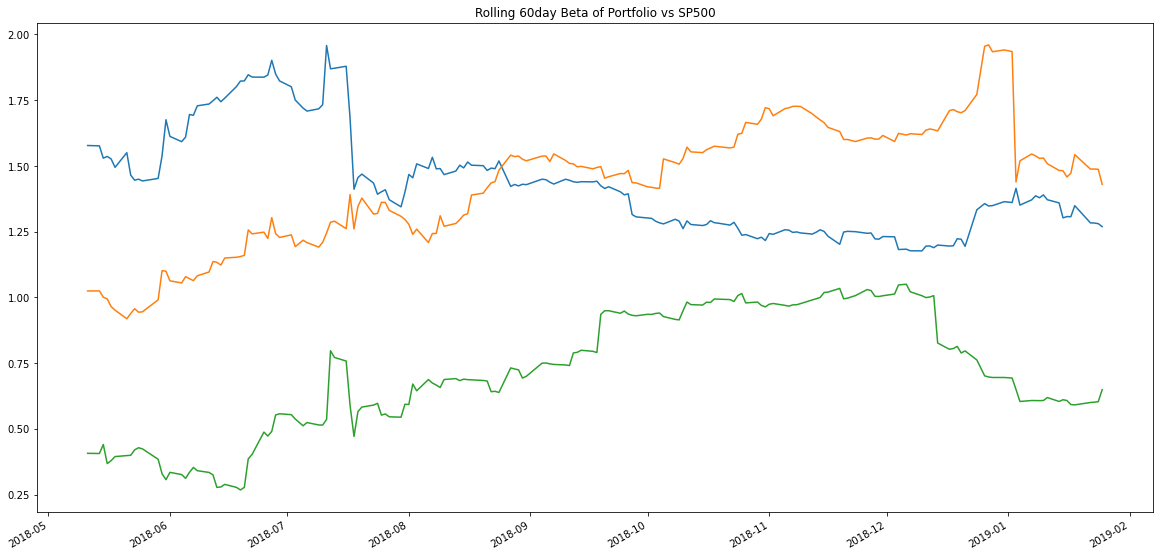

In [380]:
ax = rolling_goog_beta.plot(figsize=(20, 10), title='Rolling 60day Beta of Portfolio vs SP500')
rolling_aapl_beta.plot(ax=ax)
rolling_cost_beta.plot(ax=ax)


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [381]:
# Calculate Annualzied Sharpe Ratios
joined_sp500_std = joined_sp500.std()
joined_sp500_std

Google         0.016059
Apple          0.018914
Costco         0.013601
WeightedRTN    0.013398
SP500          0.009584
dtype: float64

In [382]:
sharpe_ratios = (joined_sp500.mean()*252)/(joined_sp500_std*(np.sqrt(252)))
sharpe_ratios

Google        -0.430354
Apple         -0.183161
Costco        -1.052624
WeightedRTN   -0.614330
SP500         -0.432942
dtype: float64

<AxesSubplot:title={'center':'MyPortfolio v. SP500 [Sharpe Ratios]'}>

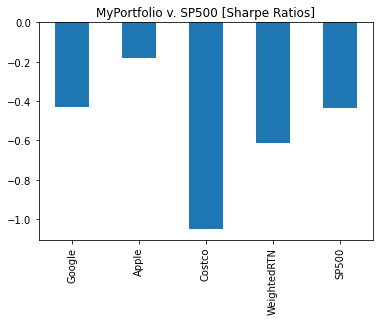

In [383]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title= "MyPortfolio v. SP500 [Sharpe Ratios]")

### How does your portfolio do?

Write your answer here!

# Not good at all 
if this data is to be believed, the sharpe rartios are all pretty abysmal, indicating greater than normal risk associated with the market today than risk-free alternatives.  Essentially, it would be more prudent to put money into risk-free alternatives, as effectively no asset class, including the SP500 index is can even "beat" risk-free options.  

Also - Risk-Free options might be doing particularly well. 

WOW ! 

## Sources

1. https://pbpython.com/currency-cleanup.html
2. https://www.interviewqs.com/ddi-code-snippets/select-pandas-dataframe-rows-between-two-dates
3. https://realpython.com/pandas-python-explore-dataset/
4. https://www.geeksforgeeks.org/remove-infinite-values-from-a-given-pandas-dataframe/
5. https://www.dataquest.io/blog/pandas-cheat-sheet/
6. https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html
7. https://stackoverflow.com/questions/3003476/get-underlined-text-with-markdown
8. 